# Assignment 3

## Digital Musicology

@authors: Joris Monnet, Xingyu Pan, Yutaka Osaki, Yiwei Liu

Due Date: 15/05/2024

### Task C1

In [2]:
import matplotlib.pyplot as plt
from music21 import converter

## Boundaries from timing/tempo differences

[0.950521, 5.6770830000000005, 16.03125, 23.844792, 27.385416999999997, 47.788021, 60.873957999999995, 65.015625, 72.33125, 83.169792, 93.9416665, 101.127083, 106.21354199999999, 110.329167, 115.68958300000001, 124.34166699999999, 147.785417, 167.866146, 176.775, 183.1067705, 192.80625, 202.70625, 217.883854, 226.707292, 233.0796875, 242.5166665, 267.06875, 289.5161455, 293.8875, 318.159375, 322.045442625, 333.589583, 340.769792]
[0.0, 2.0, 7.0, 10.0, 12.0, 22.0, 27.0, 29.0, 33.0, 37.0, 43.0, 46.0, 48.0, 50.0, 53.0, 57.0, 66.0, 74.0, 78.0, 81.0, 85.0, 89.0, 95.0, 99.0, 102.0, 106.0, 116.0, 124.0, 126.0, 138.0, 140.0, 145.0, 149.0]


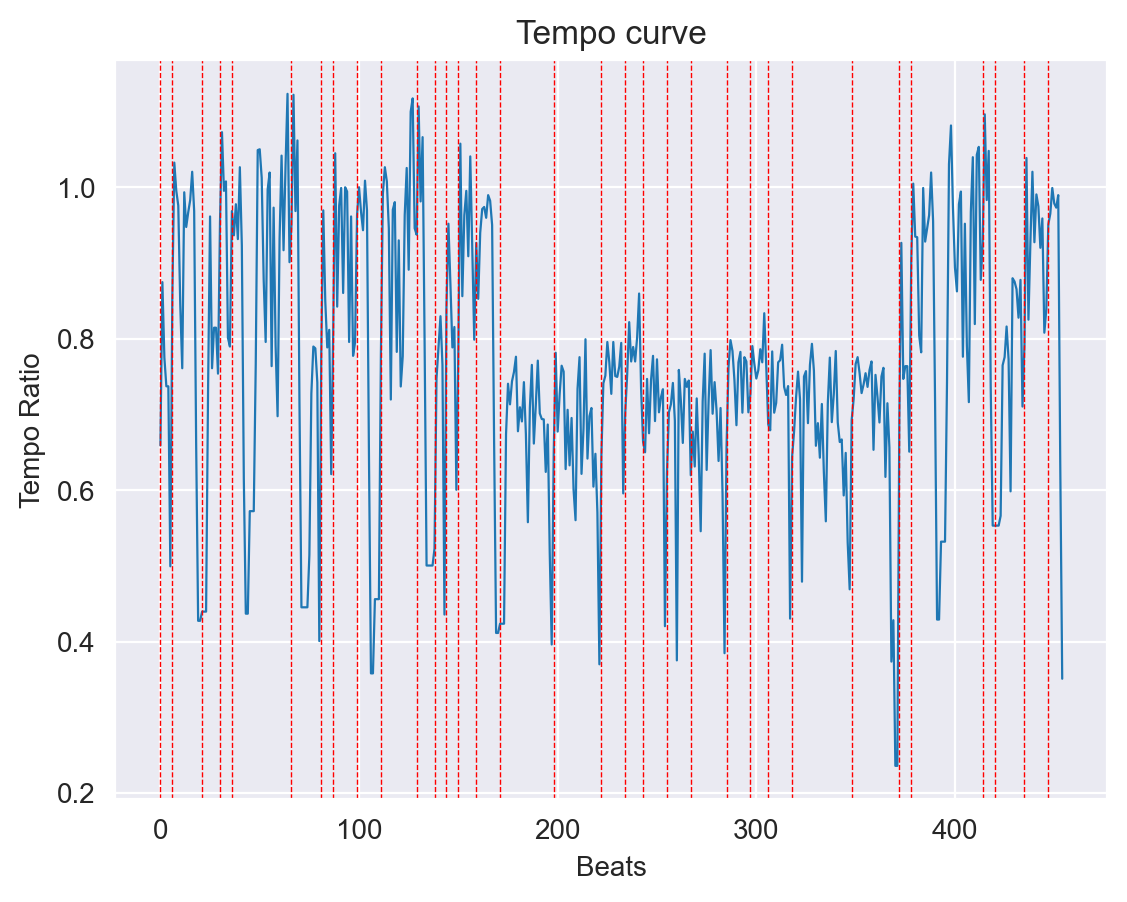

In [59]:
%reload_ext autoreload

from src.timing_plotter import plot_timing_for_one_piece
from src.timing_for_one_piece import get_average_timing_one_piece, get_tempo_map
from src.task_c1 import get_phrase_boundaries

boundaries, boundaries_times = get_phrase_boundaries('asap-dataset/Schubert/Moment_Musical_no_1')
print(boundaries_times)
measures = [boundaries[i] / 3 for i in range(len(boundaries))]
print(measures)
average = get_average_timing_one_piece('asap-dataset/Schubert/Moment_Musical_no_1')
plot_timing_for_one_piece(get_tempo_map(average), boundaries)

## Function to distinguish phrases based on volume using midi file


In [53]:
import music21

midi_file_path = 'asap-dataset/Schubert/Moment_Musical_no_1/MunA10M.mid'
midi_data = music21.converter.parse(midi_file_path)
tempo = midi_data.metronomeMarkBoundaries()[0][2].number

In [54]:
from src.task_c1 import get_times_volumes_measures, get_scaled_differences_in_volumes, get_times_threshold, \
    offset_to_seconds

list_time, list_volumes, list_measures = get_times_volumes_measures(midi_file_path)
list_volume_differences_scaled = get_scaled_differences_in_volumes(list_volumes)
times_above_threshold_ = get_times_threshold(list_time, list_volume_differences_scaled, 0.15)
times_above_threshold = [float(x) for x in times_above_threshold_]
filtered_data = []
threshold_closest = 2

filtered_data = [times_above_threshold[0]]
for i in range(1, len(times_above_threshold)):
    if times_above_threshold[i] - filtered_data[-1] > threshold_closest:
        filtered_data.append(times_above_threshold[i])
        
split_point = [offset_to_seconds(x, tempo) for x in filtered_data]
print(split_point)

[33.333333333333336, 41.75, 51.125, 63.833333333333336, 75.875, 87.875, 97.16666666666667, 102.625, 121.125, 142.20833333333334, 143.33333333333334, 158.75, 162.20833333333334, 192.91666666666666, 205.25, 206.95833333333334, 212.45833333333334, 234.75, 241.91666666666666, 253.58333333333334, 256.5833333333333, 260.4583333333333, 278.4583333333333, 282.125, 293.5833333333333, 304.0833333333333, 311.7083333333333, 312.7916666666667, 314.4583333333333, 331.9583333333333]


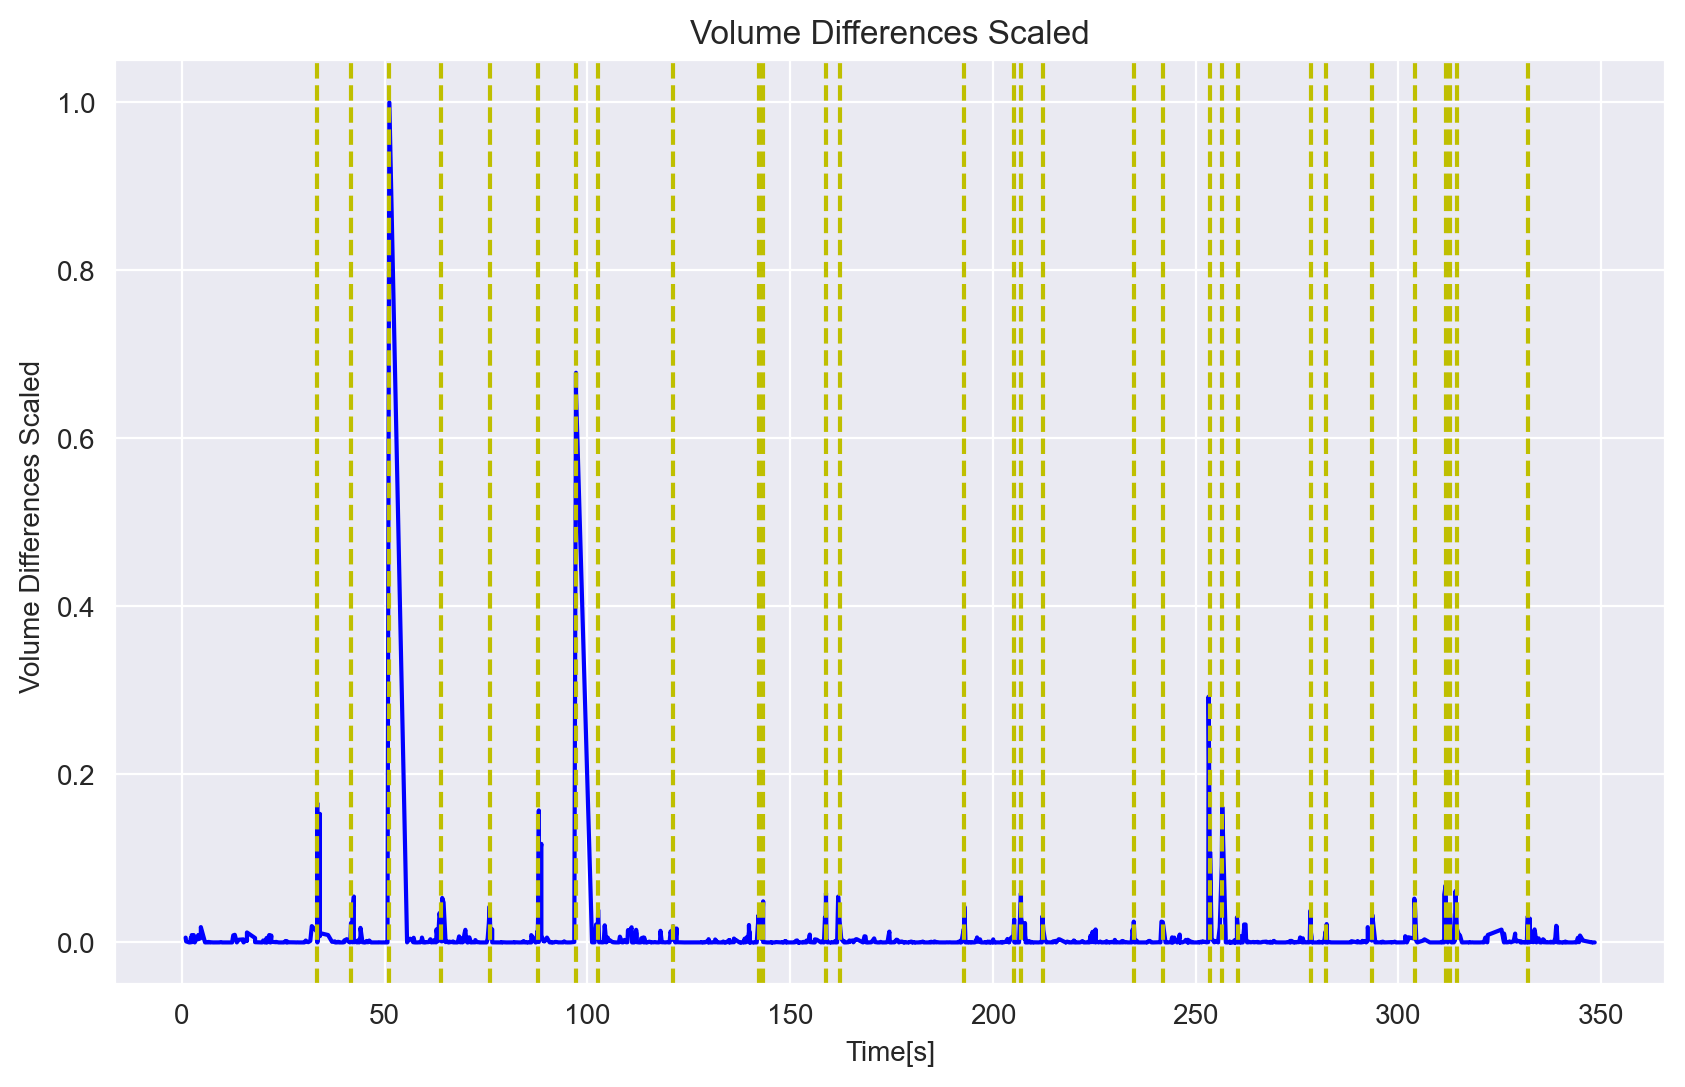

In [55]:
from src.task_c1 import plot_volume

plot_volume(list_volume_differences_scaled, filtered_data, list_time, tempo)

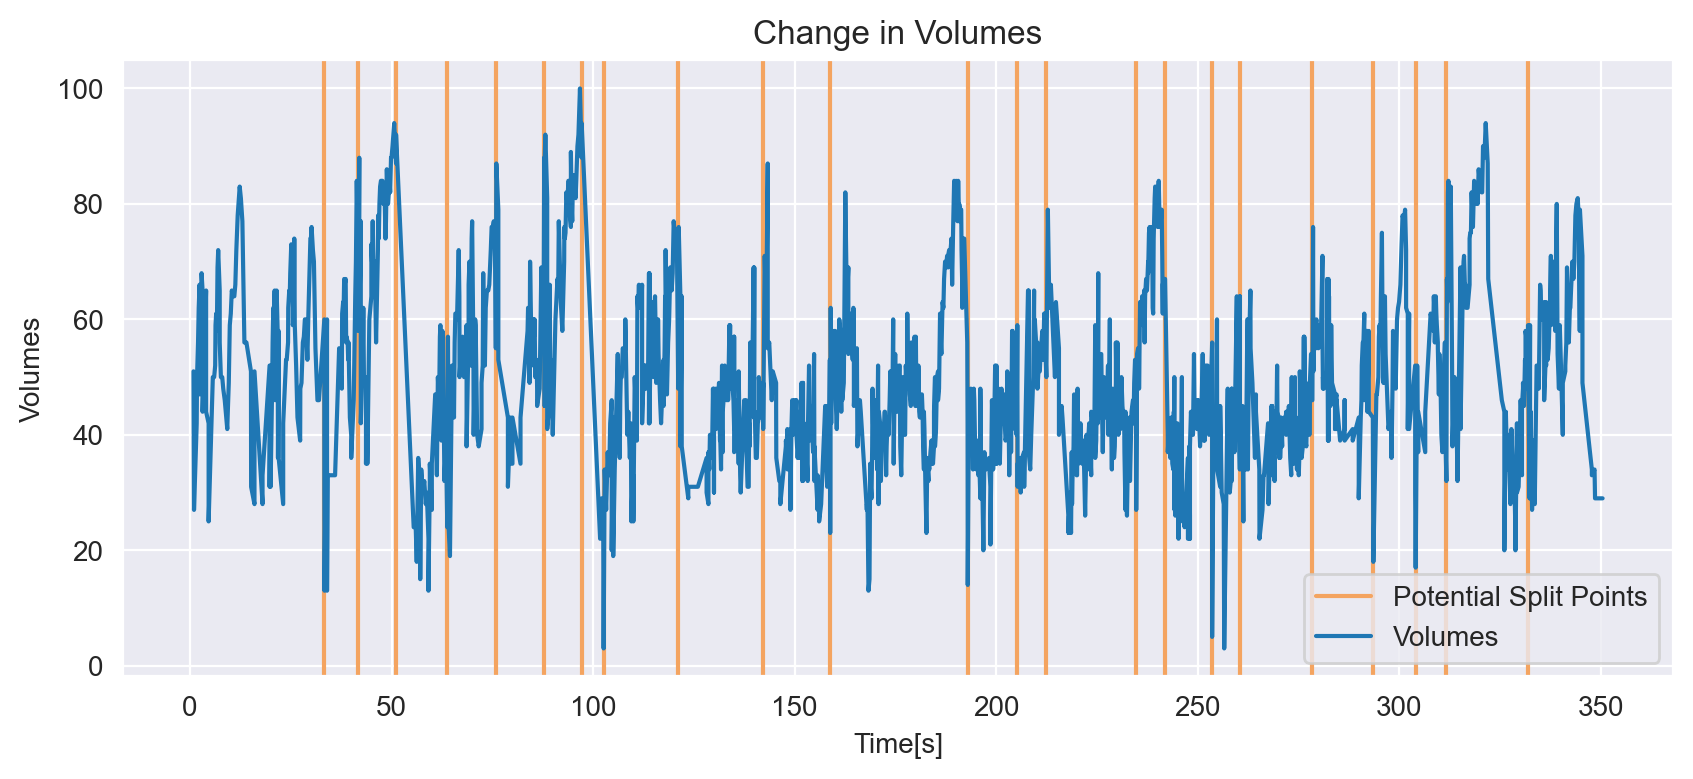

In [56]:
potential_split_point = [split_point[0]]
for point in split_point:
    for p in potential_split_point:
        if abs(p - point) < 5:
            break
    else:
        potential_split_point.append(point)

list_time_second = [offset_to_seconds(x, tempo) for x in list_time]
plt.figure(figsize=(10, 4))
plt.title("Change in Volumes")
plt.ylabel("Volumes")
plt.xlabel("Time[s]")
for x in potential_split_point:
    plt.axvline(x=x, color="sandybrown", linestyle = "-", label="Potential Split Points")
plt.plot(list_time_second, list_volumes, label="Volumes")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

## Boundaries From performance attributes merged

In [64]:
result_boundaries = []
boundaries_to_times = {}
for i in range(len(boundaries)):
    boundaries_to_times[boundaries_times[i]] = boundaries[i]

threshold_similarity = 5
min_velocity = min(split_point) - threshold_similarity
max_velocity = max(split_point) + threshold_similarity

for point in split_point:
    for boundaries_time in boundaries_times:
        if abs(boundaries_time - point) < threshold_similarity and boundaries_time not in result_boundaries:
            result_boundaries.append(boundaries_time)
            break
        elif boundaries_time < min_velocity and boundaries_time not in result_boundaries:
            result_boundaries.append(boundaries_time)
            break
        elif boundaries_time > max_velocity and boundaries_time not in result_boundaries:
            result_boundaries.append(boundaries_time)
            break

print("TIMINGS: ")
print(result_boundaries)
print("-------------------")

# Get Measure from boundaries time
result_measures = []
for boundary in result_boundaries:
    b = boundaries_to_times[boundary]
    result_measures.append(b / 3)
    
realigned_measures = []

for measure in result_measures:
    if 7 < measure:
        measure -= 8
    if 28 < measure:
        measure -= 21
    if 36 < measure:
        measure -= 8
    if 57 < measure:
        measure -= 21
    realigned_measures.append(measure)
        
print("MEASURES: ")
print(realigned_measures)
print("-------------------")

realigned_measures.sort()
sizes = [realigned_measures[i+1] - realigned_measures[i] for i in range(len(realigned_measures) - 1)]
sizes = [x for x in sizes if x > 0]
print("SIZE OF PHRASES: ")
print(sizes)
print("-------------------")

TIMINGS: 
[0.950521, 5.6770830000000005, 16.03125, 23.844792, 27.385416999999997, 83.169792, 93.9416665, 101.127083, 124.34166699999999, 340.769792, 147.785417, 192.80625, 202.70625, 233.0796875, 242.5166665, 289.5161455, 318.159375, 333.589583]
-------------------
MEASURES: 
[0.0, 2.0, 7.0, 2.0, 4.0, 8.0, 14.0, 17.0, 28.0, 91.0, 29.0, 48.0, 52.0, 44.0, 48.0, 66.0, 80.0, 87.0]
-------------------
SIZE OF PHRASES: 
[2.0, 2.0, 3.0, 1.0, 6.0, 3.0, 11.0, 1.0, 15.0, 4.0, 4.0, 14.0, 14.0, 7.0, 4.0]
-------------------


### Task C3

### Task C4